In [1]:
import torch
import numpy as np

from data import Interval, System, Data
from model import FCNet
from solver import SysODESolver
from plotting import ODEPlotter

device = torch.device('cpu')

System of ODEs:

$y_1'=y_2$

$y_2'=-y_1$

Initial conditions:

$y_1(0) = 0, y_2(0) = 1$

Analytic solution:

$y_1(t) = \text{sin}(t)$

$y_2(t) = \text{cos}(t)$

In [2]:
def odes(x, y, dy):
    y1, y2 = y[:, 0], y[:, 1]
    dy1, dy2 = dy[:, 0], dy[:, 1]
    return [
        dy1 - y2,
        dy2 + y1
    ]

def sols(x):
    return [
        torch.sin(x),
        torch.cos(x)
    ]

def d_sols(x):
    return [
        torch.cos(x),
        -torch.sin(x)
    ]
    
ode_system = System(odes)
sol_system = System(sols)

initial_conditions = [0, 0, 1]

In [3]:
features_in = 1
features_out = 2
hidden = [100, 100, 100, 100, 100]

model = FCNet(features_in, hidden, features_out, activation='cas', init_weights=False)

domain = Interval(0, 2*np.pi, steps=1000)
data = Data(domain, ode_system, initial_conditions, sol_system)

solver = SysODESolver(model, data, device=device)
solver.compile('adamW', lr=1e-3, loss_weights=[1.0, 1.0], opt={}, sch={'step_size': 100, 'gamma': 0.95})

losses = solver.train(num_epochs=10000, atol=1e-5, save_gif=True)
solver.create_gif(gif_save_path='gif_test5')

Training Progress:   3%|▊                        | 302/10000 [00:08<04:46, 33.89it/s, Loss: 0.00000997 | LR: 0.00085737]


Stopping criterion met at epoch 302: Loss is less than 1e-05.
GIF saved at gif_test5/cas_100_100_100_100_100.gif


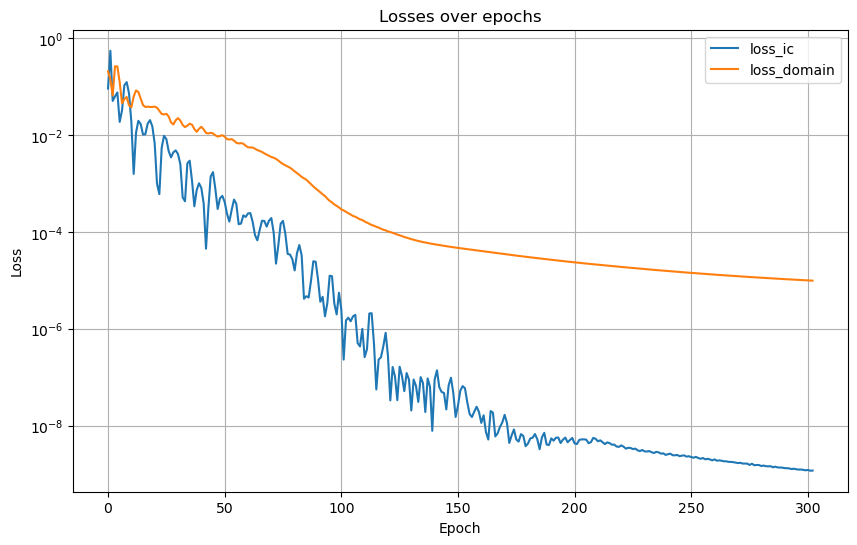

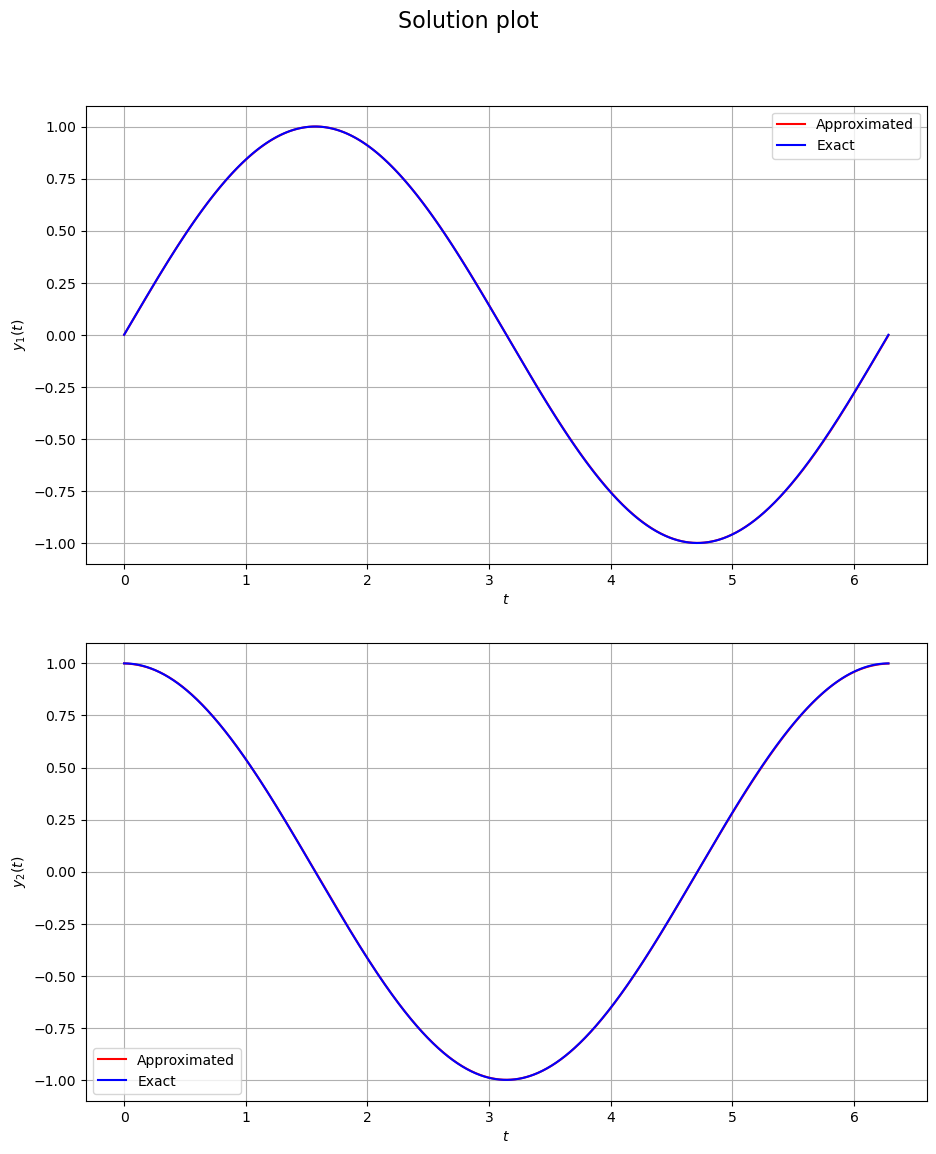

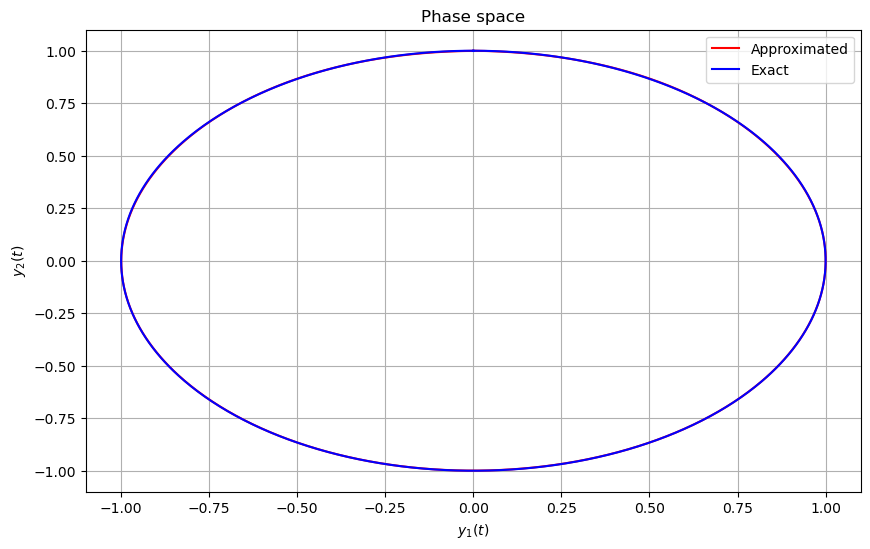

In [4]:
plot = ODEPlotter(solver)

plot.losses(losses)
plot.numerical_solution()
plot.phase_space()